# Part I - (Fight Data Exploration)
## by (Timileyin Oladayo)

## Introduction

>Have you ever been trapped in an airport because your flight was delayed or cancelled and wondered if you could have foreseen it with better information? This is your opportunity to find out.

> The dataset used in this study can be gotten from here https://community.amstat.org/jointscsg-section/dataexpo/dataexpo2009

> Due to the big nature of the dataset, I will be using only 2008 data here https://dataverse.harvard.edu/file.xhtml?persistentId=doi:10.7910/DVN/HG7NV7/EIR0RA&version=1.0

## Preliminary Wrangling


In [8]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [9]:
df = pd.read_csv("2008.csv")

In [10]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0


In [11]:
df.shape

(2389217, 29)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [13]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [14]:
df.sample(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
2229200,2008,4,6,7,2226.0,2220,2259.0,2301,NW,1218,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
799863,2008,2,23,6,2123.0,2125,2202.0,2206,OO,5426,...,3.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
523236,2008,1,30,3,1003.0,1005,1255.0,1315,AA,2062,...,3.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1322759,2008,3,23,7,1650.0,1659,1905.0,1920,YV,2661,...,6.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1791767,2008,4,3,4,1811.0,1810,1917.0,1905,WN,2194,...,5.0,25.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


> Lets do some quick data cleanup and feature selections

**Duplicated rows will be delected**

In [15]:
df.duplicated().sum()

4

In [16]:
df = df.drop_duplicates()

**remove rows which are cancelled or diverted, and remove unnecessary columns**

- This is because the focus of this analysis is on delayed flights not cancelled or diverted

In [17]:
print(df["Cancelled"].value_counts())
print(df["Diverted"].value_counts())
assert df[(df.Cancelled ==1) & (df.Diverted ==1)].shape[0] == 0

df = df[(df.Cancelled==0) & (df.Diverted==0)]
print(df.Cancelled.value_counts())
print(df.Diverted.value_counts())
df = df.drop(columns=["Cancelled","Diverted","CancellationCode"])

0    2324771
1      64442
Name: Cancelled, dtype: int64
0    2383559
1       5654
Name: Diverted, dtype: int64
0    2319117
Name: Cancelled, dtype: int64
0    2319117
Name: Diverted, dtype: int64


**Lets check data types and make corrections**

In [18]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,HOU,LIT,393,4.0,9.0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,HOU,MAF,441,3.0,8.0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,HOU,MAF,441,2.0,14.0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,HOU,MCO,848,5.0,7.0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,HOU,MCO,848,6.0,10.0,16.0,0.0,0.0,0.0,0.0


In [19]:
df.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

- I will be changing DepTime "CRSDepTime" "ArrTime" and "CRSArrTime" to string

In [20]:
df = df.astype({'DepTime':str, "CRSDepTime":str, "ArrTime":str, "CRSArrTime":str})

In [21]:
df.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime               object
CRSDepTime            object
ArrTime               object
CRSArrTime            object
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

- Lets add another column to show the delay time.
- This is calculated from from "ActualElapsedTime" - "CRSElapsedTime".

In [22]:
df["delay_elapsed"] = df.ActualElapsedTime - df.CRSElapsedTime
df.head(1)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,delay_elapsed
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,LIT,393,4.0,9.0,16.0,0.0,0.0,0.0,0.0,-2.0


In [23]:
df[(df.ArrDelay - df.DepDelay - df.delay_elapsed) < -3]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,delay_elapsed


In [24]:
# confiem that ArrDelay = DepDelay + delay_elapsed (allowing erros within 3 minutes)

assert df[ (df.ArrDelay - df.DepDelay - df.delay_elapsed < -3) | (df.ArrDelay - df.DepDelay - df.delay_elapsed > 3)].shape[0] == 0

In [25]:
## new shape
df.shape

(2319117, 27)

### What is the structure of your dataset?

> Originally, the data set has 2389217 rows, and 29 Columns. After some cleanup, the dataset now have 2319117 rows and 27 columns

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest will be what causes longer delays

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Date, Airline, WeatherDelay, NAS Delay, SecurityDelay, LateAircraftDelay, Distance and more will be very important to this analysis

## Univariate Exploration

> In this section, I want to visualize Distance and their distribution

> I will also be paying attention to

- ArrTime
- DepDelay
- Arr Delay
- delay_elapsed


#### Distance

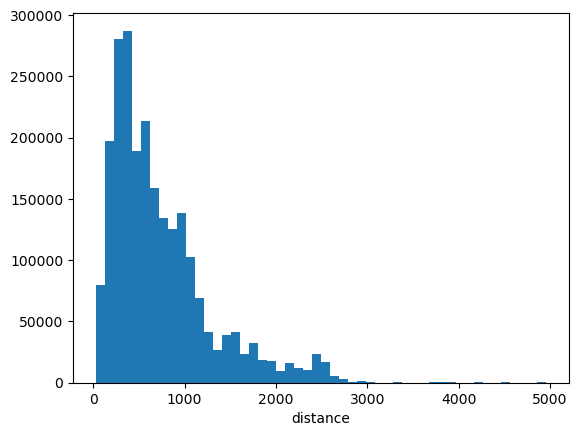

In [26]:
plt.hist(data = df, x = "Distance", bins = 50)
plt.xlabel("distance");

In [27]:
# The extremely high values  should be sampled to check
df[ df.Distance > 3500].sample(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,delay_elapsed
1164549,2008,2,6,3,1626.0,1615,2131.0,2112,DL,851,...,HNL,4502,8.0,23.0,11.0,0.0,8.0,0.0,0.0,8.0
478337,2008,1,29,2,2040.0,2040,745.0,800,AA,102,...,DFW,3784,9.0,17.0,NaN,NaN,NaN,NaN,NaN,-15.0
588307,2008,1,1,2,1614.0,1616,2112.0,2113,DL,851,...,HNL,4502,5.0,16.0,NaN,NaN,NaN,NaN,NaN,1.0
1018508,2008,2,7,4,1850.0,1820,638.0,555,NW,808,...,MSP,3972,6.0,31.0,30.0,0.0,13.0,0.0,0.0,13.0
2353673,2008,4,25,5,1345.0,1335,1826.0,1810,CO,15,...,HNL,4962,4.0,17.0,0.0,0.0,6.0,0.0,10.0,6.0


- There is a long tail in the distribution, so put it on a log scale instead.

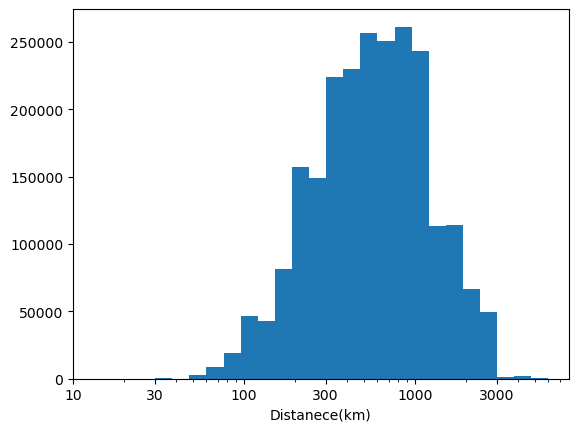

In [28]:

bin = 10 ** np.arange(np.log10(df.Distance.min()), np.log10(df.Distance.max())+0.1, 0.1)
plt.hist(data=df, x="Distance", bins=bin)
plt.xscale("log")
plt.xlabel("Distanece(km)")
plt.xticks([10,30,100,300,1000,3000],[10,30,100,300,1000,3000]);

> The distribution of distance is long-tailed, with many flights on the short end and a few on the long end. When plotted on a log-scale, the distance distribution seems to be generally normal, with distance ceilings at the right foot. This is simply because the greater the distance between airports, the fewer flights are available. One of the highest values is a flight from or to Hawaii.

#### ArrTime

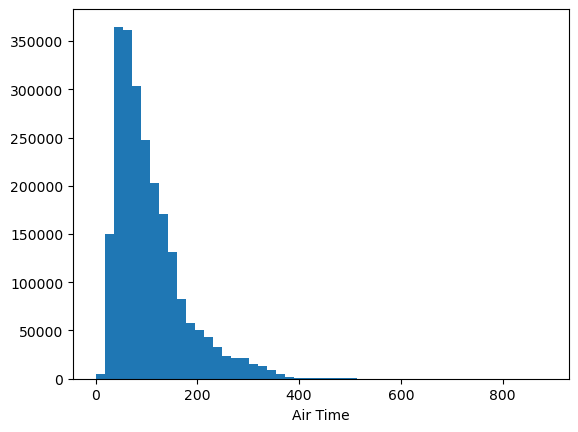

In [29]:
plt.hist(data = df, x = "AirTime", bins = 50)
plt.xlabel("Air Time");

> AirTime is long-tailed and right-skewed, with a distribution shape comparable to distance.

#### ArrDelay

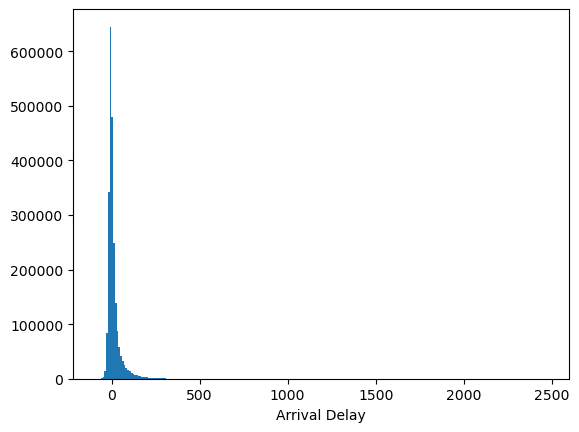

In [30]:
plt.hist(data=df, x="ArrDelay", bins=np.arange(df.ArrDelay.min(),df.ArrDelay.max()+10,10) )
plt.xlabel("Arrival Delay");

#### DepDelay

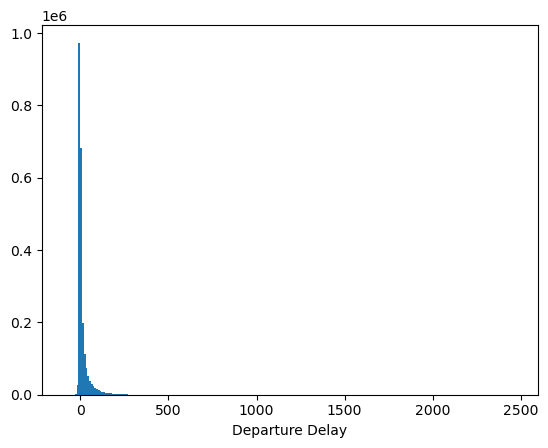

In [31]:
plt.hist(data=df, x="DepDelay",bins=np.arange(df.ArrDelay.min(),df.ArrDelay.max()+10,10))
plt.xlabel("Departure Delay");

#### Delay_Elapsed

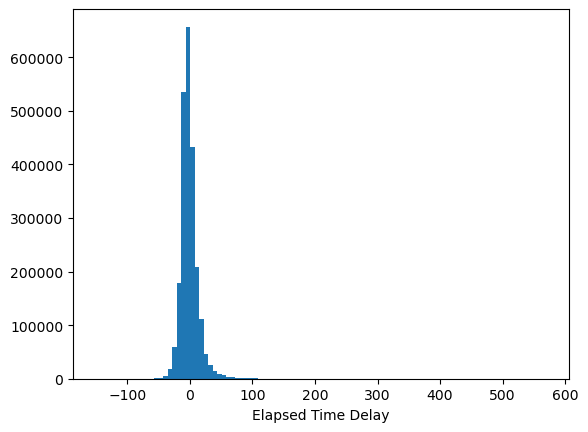

In [32]:
plt.hist(data=df, x="delay_elapsed", bins = 100)
plt.xlabel("Elapsed Time Delay");

#### Distribution Month, Day, airline

In [34]:
df.head(2)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,delay_elapsed
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,LIT,393,4.0,9.0,16.0,0.0,0.0,0.0,0.0,-2.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,MAF,441,3.0,8.0,NaN,NaN,NaN,NaN,NaN,-3.0


In [36]:
df.Month.unique()

array([1, 2, 3, 4], dtype=int64)

<AxesSubplot:xlabel='count', ylabel='UniqueCarrier'>

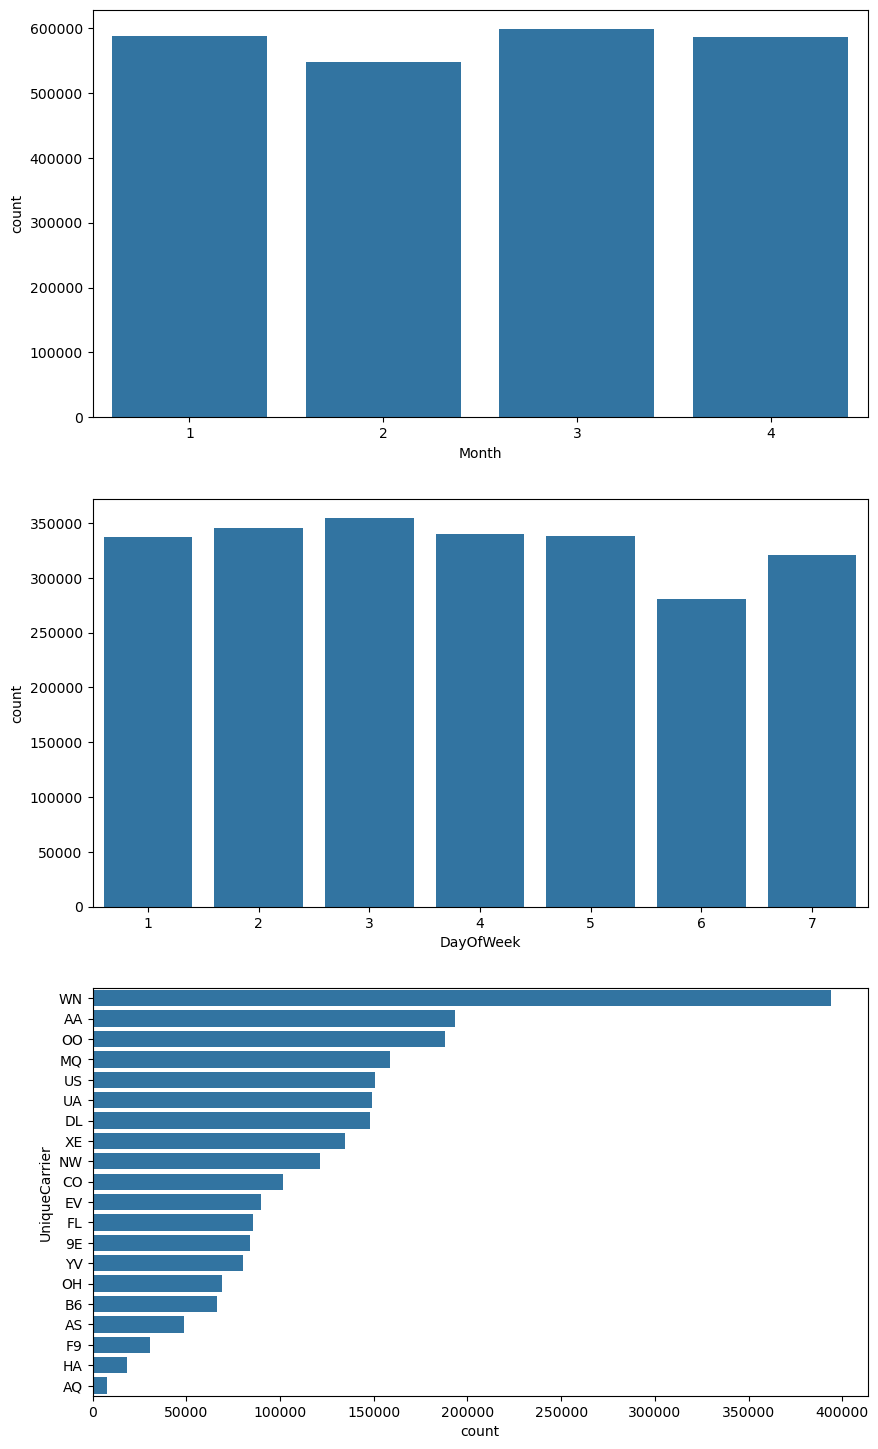

In [35]:
fig, ax = plt.subplots(nrows=3, figsize = [10,18])

base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'Month', color = base_color, ax = ax[0])
sb.countplot(data = df, x = 'DayOfWeek', color = base_color, ax = ax[1])
order=df['UniqueCarrier'].value_counts().index
sb.countplot(data=df,y='UniqueCarrier',color=base_color,order=order)

> There are less flight on saturdays

> There are 5 most prominent airlines: WN (Southwest Airlines), DL (Delta Airlines), AA (American Airlines), OO (Skywest Airlines) and UA (United Airlines)

#### 5 delay Factors

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


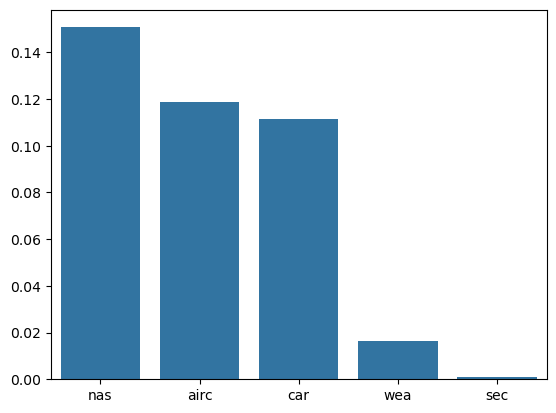

In [37]:
# The proportion where each type of delay occurs.
p_car = df[(~df.CarrierDelay.isnull()) & (df.CarrierDelay!=0)].shape[0] / df.shape[0]
p_wea = df[(~df.WeatherDelay.isnull()) & (df.WeatherDelay!=0)].shape[0] / df.shape[0]
p_nas = df[(~df.NASDelay.isnull()) & (df.NASDelay!=0)].shape[0] / df.shape[0]
p_sec = df[(~df.SecurityDelay.isnull()) & (df.SecurityDelay!=0)].shape[0] / df.shape[0]
p_airc = df[(~df.LateAircraftDelay.isnull()) & (df.LateAircraftDelay!=0)].shape[0] / df.shape[0]

delay_types = pd.Series([p_car,p_wea,p_nas,p_sec,p_airc], index=["car","wea","nas","sec","airc"]).sort_values(ascending=False)
sb.barplot(delay_types.index, delay_types, color=sb.color_palette()[0]);

> According to the graph, we can see the likelihood of two different types of delays occurring during flights in 2008, even if they happen at the same time. The data shows that delays caused by the National Airspace System (NAS) are more common than delays caused by bad weather or security checks, which is surprising because these were previously thought to be the main reasons for flight delays.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The arrival delay distribution had a slight rightward skew, with the most frequent delay being around 0 minutes. This indicates that a considerable number of flights actually arrive earlier than scheduled. To gain a better understanding, it may be useful to analyze the data further by separating it into two categories: departure delay and elapsed time delay.

> I created a visualization to display the characteristics of the five delay factors. The plot indicated that the National Airspace System (NAS) was the most common cause of delays, followed by LateAircraftDelay, CarrierDelay, and WeatherDelay. In terms of the duration of the delay, LateAircraftDelay and WeatherDelay tended to be longer than NASDelay and CarrierDelay. SecurityDelay was found to have a weaker impact than the other four factors, so I decided to focus on investigating the four main delay factors going forward.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> While examining the distance variable, I came across some data points that had exceptionally long distances exceeding 3500km. Upon further investigation, I discovered that these records corresponded to flights to or from Hawaiian airports, so I excluded them from my analysis.

## Bivariate Exploration

> I will be checking pairwise correlations between featues in the dataset

In [38]:
df2 = df.copy()
numeric_vars = ["ArrDelay","delay_elapsed","DepDelay","Distance","AirTime","NASDelay","LateAircraftDelay","CarrierDelay","WeatherDelay"]
categoric_var = []

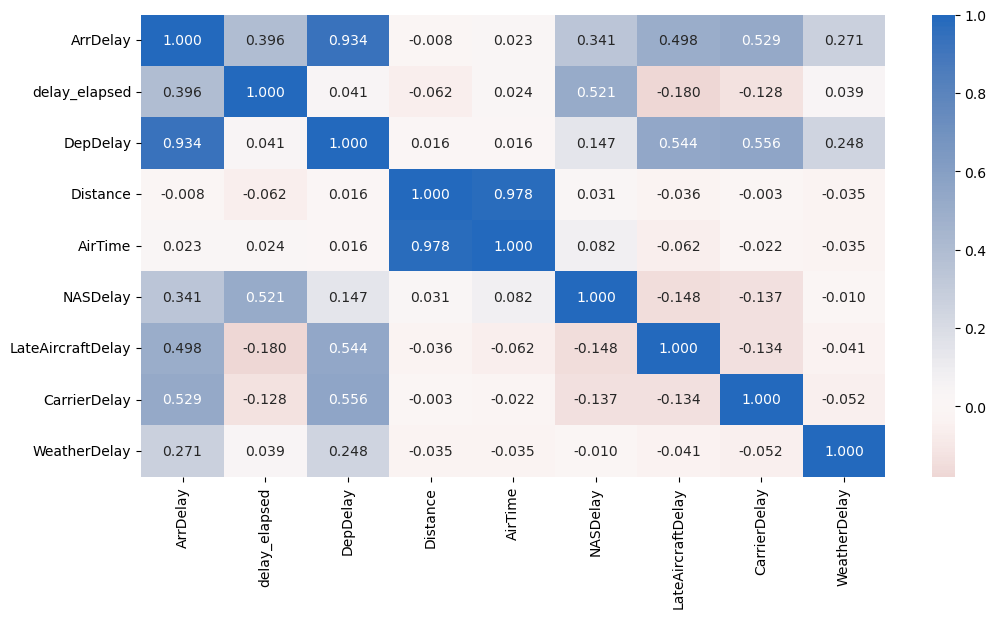

In [39]:
# correlation plot
plt.figure(figsize=[12,6])
sb.heatmap(df[numeric_vars].corr(), annot=True, fmt=".3f", cmap="vlag_r", center=0);

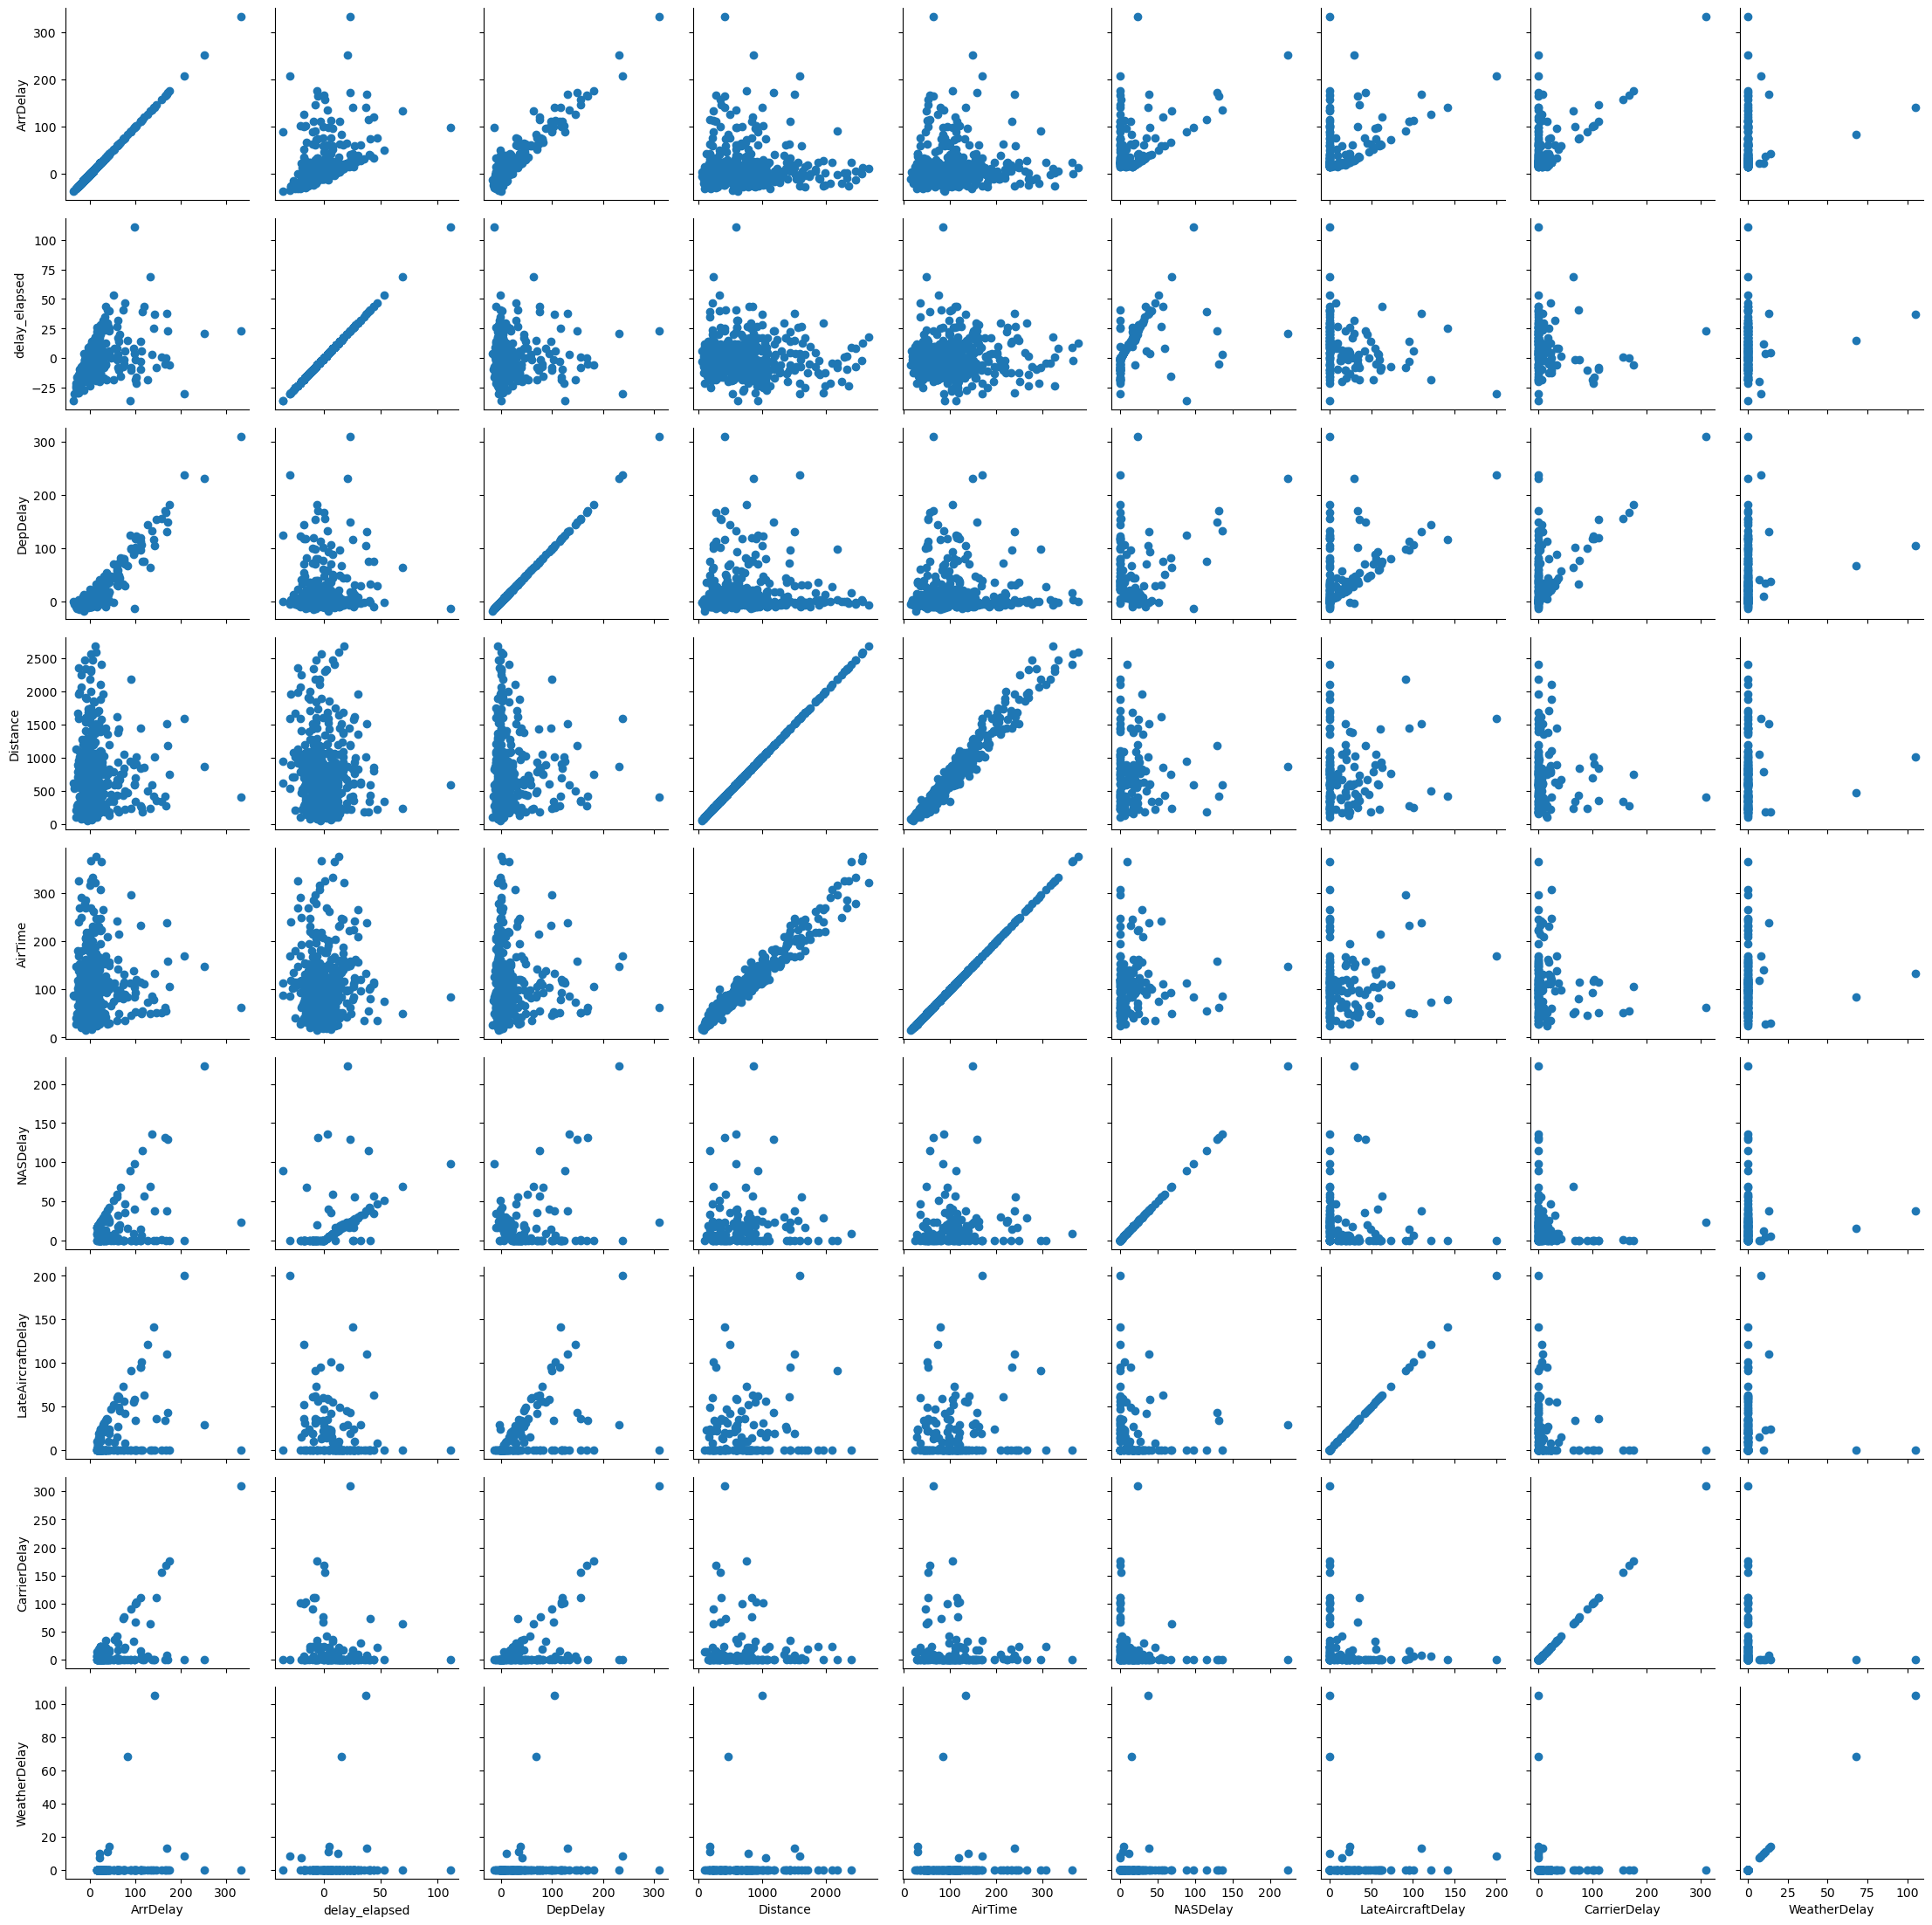

In [40]:
# plot matrix : sample 1000 flight data so that plots are clearer and they render faster
samples = np.random.choice(df2.shape[0], 500, replace=False)
df2_sample = df2.iloc[samples,:]

g = sb.PairGrid(data=df2_sample, vars=numeric_vars)
#g = g.map_diag(plt.hist, bins = 30);
g.map(plt.scatter);

> As anticipated, Distance and AirTime were found to have a strong positive correlation. This is reasonable as longer distances generally require longer flight times. In this section, I will investigate this relationship further, particularly regarding extremely short AirTimes that were identified in the previous section. Additionally, it is worth mentioning that Arrival Delay time exhibited a stronger correlation with Departure Delay, indicating that Arrival Delay is more dependent on Departure Delay.

> The correlation coefficients between delay_elapsed/DepDelay and each of the four delay factors are noteworthy. Elapsed Time delay exhibited the strongest correlation with NAS Delay, as opposed to the other three factors. This can be attributed to the fact that the NAS System is closely linked with flight duration.

#### DepDelay vs. ElapsedTimeDelay / DepDelay vs. ArrDelay / ElapsedTimeDelay vs. ArrDelay¶

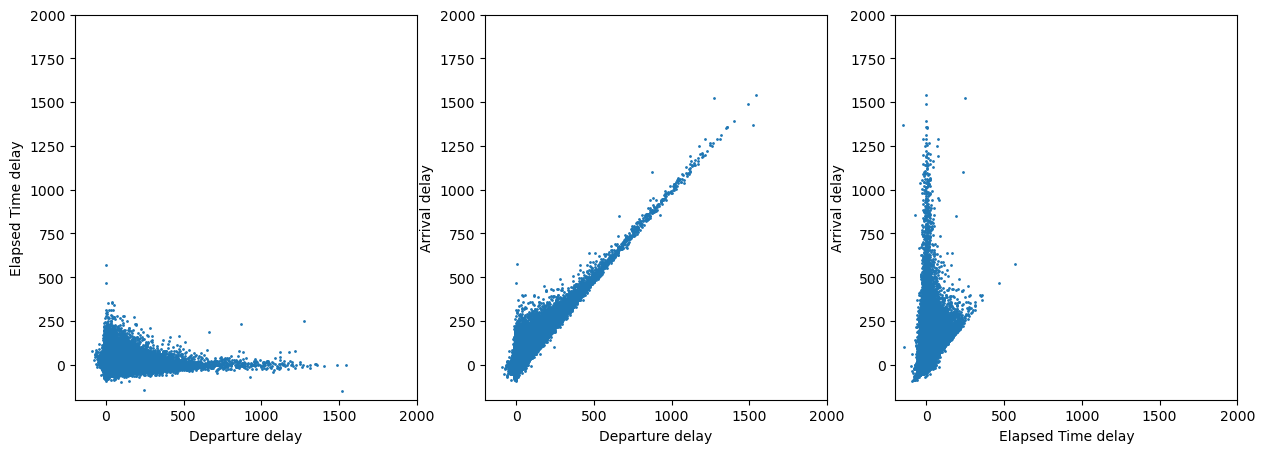

In [41]:
plt.figure(figsize=[15,5])

plt.subplot(1,3,1)
plt.scatter(data=df2, x="DepDelay", y="delay_elapsed", s=1)
plt.xlabel("Departure delay")
plt.ylabel("Elapsed Time delay");
plt.xlim([-200,2000])
plt.ylim([-200,2000]);

plt.subplot(1,3,2)
plt.scatter(data=df2, x="DepDelay", y="ArrDelay", s=1)
plt.xlabel("Departure delay")
plt.ylabel("Arrival delay")
plt.xlim([-200,2000])
plt.ylim([-200,2000]);

plt.subplot(1,3,3)
plt.scatter(data=df2, x="delay_elapsed", y="ArrDelay", s=1)
plt.xlabel("Elapsed Time delay")
plt.ylabel("Arrival delay")
plt.xlim([-200,2000])
plt.ylim([-200,2000]);

> The graph on the left illustrates that Departure Delay is generally longer than Elapsed Time delay. This observation is further supported by the second and third graphs. While the third graph does show an increase in Arrival Delay as Elapsed Time increases, this trend is limited to cases where Elapsed Time is less than 500.

#### Distance vs. Each-4DelayFactors

In [43]:
# make dummy dataframe which has 4 columns, delay type, delay time, DepDelay, delay_elapsed
dummy2 = pd.DataFrame()
delay_types = ["NASDelay","LateAircraftDelay","CarrierDelay","WeatherDelay"]

for type in delay_types:
    dum = pd.DataFrame()
    dum["time"] = df2[(df2[type] != 0) & (~df2[type].isnull())][type]
    dum["DepDelay"] = df2[(df2[type] != 0) & (~df2[type].isnull())]["DepDelay"]
    dum["delay_elapsed"] = df2[(df2[type] != 0) & (~df2[type].isnull())]["delay_elapsed"]
    dum["ArrDelay"] = df2[(df2[type] != 0) & (~df2[type].isnull())]["ArrDelay"]
    dum["Distance"] = df2[(df2[type] != 0) & (~df2[type].isnull())]["Distance"]
    dum["type"] = type
    dummy2 = dummy2.append(dum)

C:\Users\Timileyin\AppData\Local\Temp\ipykernel_16932\96175721.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dummy2 = dummy2.append(dum)
C:\Users\Timileyin\AppData\Local\Temp\ipykernel_16932\96175721.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dummy2 = dummy2.append(dum)
C:\Users\Timileyin\AppData\Local\Temp\ipykernel_16932\96175721.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dummy2 = dummy2.append(dum)
C:\Users\Timileyin\AppData\Local\Temp\ipykernel_16932\96175721.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dummy2 = dummy2.append(dum)


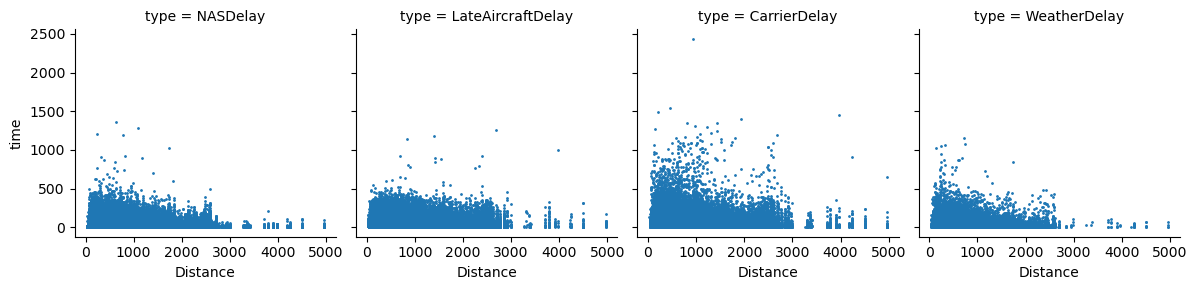

In [44]:
g = sb.FacetGrid(data=dummy2, col="type")
g.map(plt.scatter, "Distance", "time", s=1);

> the distance seems to be not the big factor for delay time.

#### ArrTime vs. Each-4DelayFactors / DepTime vs. Each-4DelayFactors / ElapsedTimeDelay vs. Each-4DelayFactors

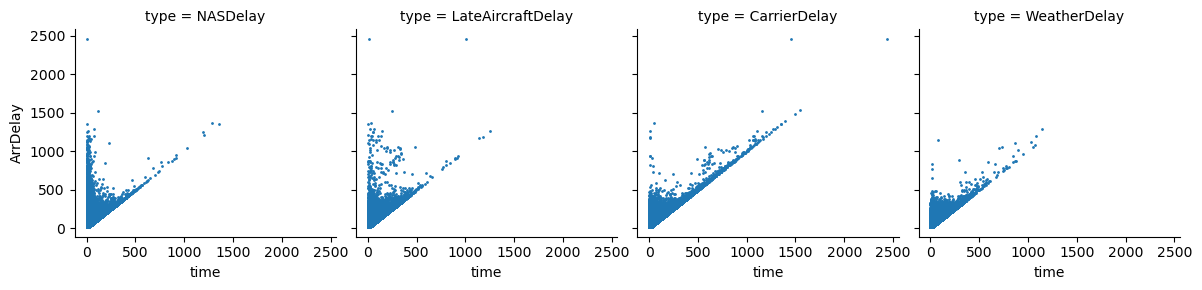

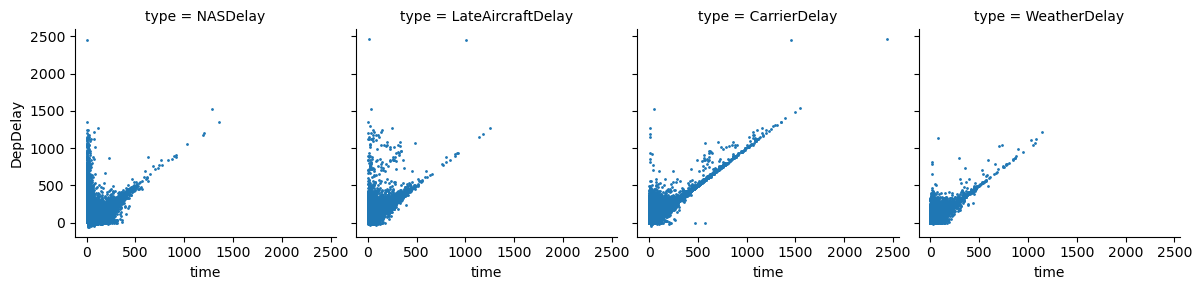

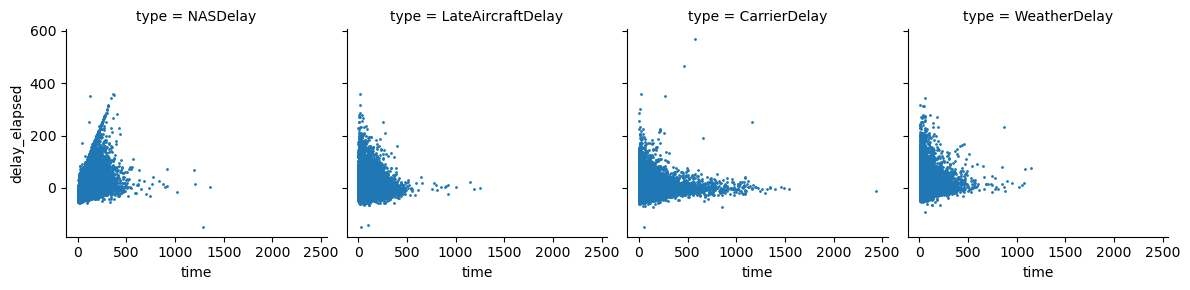

In [45]:
#plt.figure(figsize=[15,15])

#plt.subplot(3,1,1)
g = sb.FacetGrid(data=dummy2, col="type")
g.map(plt.scatter, "time", "ArrDelay", s=1);

#plt.subplot(3,1,2)
g = sb.FacetGrid(data=dummy2, col="type")
g.map(plt.scatter, "time", "DepDelay", s=1);

#plt.subplot(3,1,3)
g = sb.FacetGrid(data=dummy2, col="type")
g.map(plt.scatter, "time", "delay_elapsed", s=1);

> The scatterplots contain several noteworthy features. The most significant observation can be made from the NAS delay x ElapsedTimeDelay plot, where it becomes apparent that while other scatterplots in the same row indicate that delay times do not substantially increase flight duration, NAS delay does have a considerable impact.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The initial discovery that caught me off guard was the relatively weak influence of distance on delay times. This holds true for both Departure Delay and Elapsed Time Delay.

> Another interesting finding was observed in the NAS delay x ElapsedTimeDelay plot. While other delay factors did not have a significant impact on in-flight duration, NAS delay was found to cause a noticeable increase in flight time. In the subsequent multivariate analysis, I will explore the relationship between Elapsed Time Delay and NAS Delay while also considering flight distance.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> As expected, a linear correlation was observed between AirTime and Distance. This relationship was utilized to detect instances of impossibly short flight times. During this process, I discovered a few outliers that were all related to flights to or from Hawaiian airports. Therefore, I decided to remove all flight data associated with Hawaii since a majority of the outliers identified were related to these flights. Additionally, the frequency of these flights was relatively low.






## Multivariate Exploration

> I will be checking multiple variables here

In [46]:
# copy the dataframe
df3 = df2.copy()

In [47]:
# make dummy dataframe which has 5 columns, delay type, delay time, DepDelay, delay_elapsed, distance

dummy3 = pd.DataFrame()
delay_types = ["NASDelay","LateAircraftDelay","CarrierDelay","WeatherDelay"]

for type in delay_types:
    dum = pd.DataFrame()
    dum["time"] = df3[(df3[type] != 0) & (~df3[type].isnull())][type]
    dum["DepDelay"] = df3[(df3[type] != 0) & (~df3[type].isnull())]["DepDelay"]
    dum["delay_elapsed"] = df3[(df3[type] != 0) & (~df3[type].isnull())]["delay_elapsed"]
    dum["ArrDelay"] = df3[(df3[type] != 0) & (~df3[type].isnull())]["ArrDelay"]
    dum["Distance"] = df3[(df3[type] != 0) & (~df3[type].isnull())]["Distance"]
    dum["type"] = type
    dummy3 = dummy3.append(dum)

C:\Users\Timileyin\AppData\Local\Temp\ipykernel_16932\2441739614.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dummy3 = dummy3.append(dum)
C:\Users\Timileyin\AppData\Local\Temp\ipykernel_16932\2441739614.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dummy3 = dummy3.append(dum)
C:\Users\Timileyin\AppData\Local\Temp\ipykernel_16932\2441739614.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dummy3 = dummy3.append(dum)
C:\Users\Timileyin\AppData\Local\Temp\ipykernel_16932\2441739614.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dummy3 = dummy3.append(dum)


#### DIstance vs. DepDelay vs. ElapsedTimeDelay

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


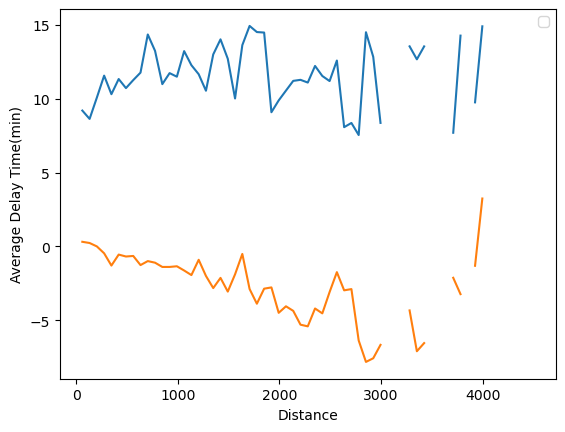

In [48]:
# Line plots of means
for de in ["DepDelay","delay_elapsed"]:
    bin_edges = np.linspace(df3.Distance.min(), df3.Distance.max(), 70)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    data_bins = pd.cut(df3.Distance, bin_edges, right = False, include_lowest=True)
    means = df3[de].groupby(data_bins).mean()
    plt.errorbar(x=bin_centers,y=means)
plt.xlabel("Distance")
plt.ylabel("Average Delay Time(min)")
plt.legend();


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


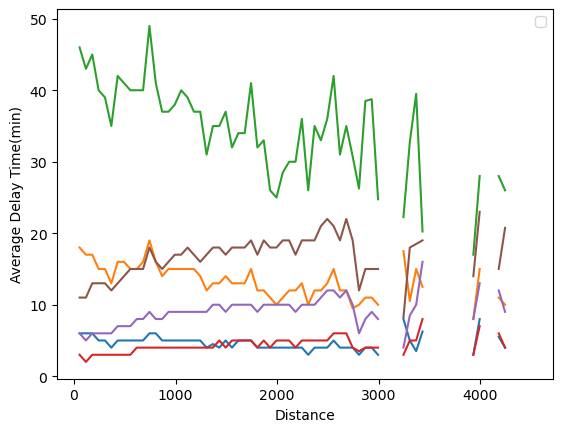

In [49]:
# Line plots of Q1~3 
df3_delay = df3[df3.delay_elapsed > 0]

for de in ["DepDelay","delay_elapsed"]:
    df3_delay = df3[df3[de] > 0]
    bin_edges = np.linspace(df3_delay.Distance.min(), df3_delay.Distance.max(), 80)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    data_bins = pd.cut(df3_delay.Distance, bin_edges, right = False, include_lowest=True)
    q1 = df3_delay[de].groupby(data_bins).quantile(.25)
    m2 = df3_delay[de].groupby(data_bins).median()
    q3 = df3_delay[de].groupby(data_bins).quantile(.75)
    plt.errorbar(x=bin_centers,y=q1)
    plt.errorbar(x=bin_centers,y=m2)
    plt.errorbar(x=bin_centers,y=q3)
plt.xlabel("Distance")
plt.ylabel("Average Delay Time(min)")
plt.legend();

> These graphs are not useful since all the information they present has already been disclosed in the bivariate analysis.

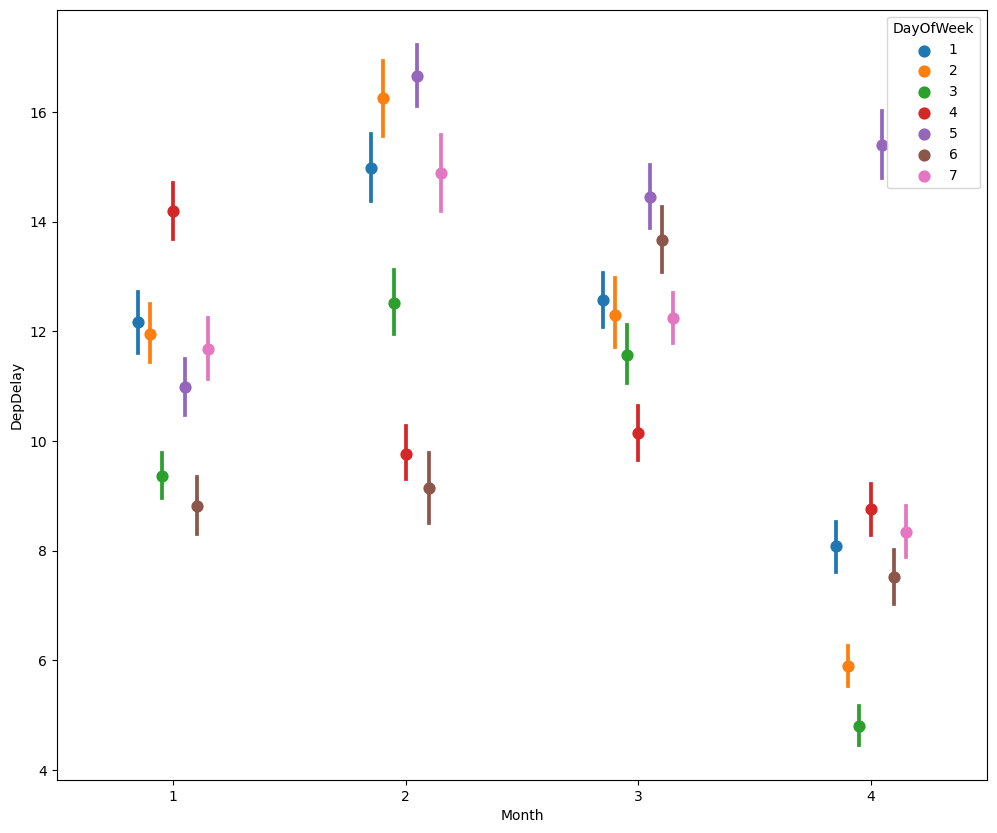

In [50]:
# let's see what happens when we combain month and day of week
plt.figure(figsize = [12,10])
sb.pointplot(data = df.sample(500000), x = 'Month', y = 'DepDelay', hue = 'DayOfWeek',linestyles = '', dodge = 0.3);

In [52]:
df.head(2)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,delay_elapsed
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,LIT,393,4.0,9.0,16.0,0.0,0.0,0.0,0.0,-2.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,MAF,441,3.0,8.0,NaN,NaN,NaN,NaN,NaN,-3.0


#### The longer elapsed time is, the longer NASdelay is

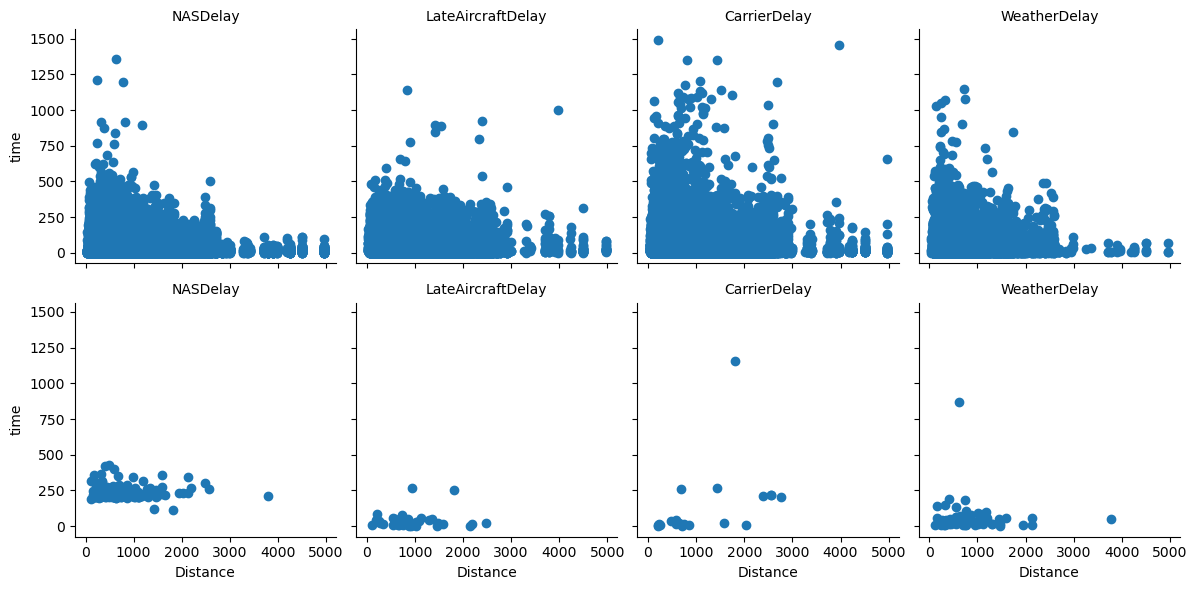

In [54]:
bin_edges = np.arange(0,600,200)
dummy3["elapsed_blocked"] = pd.cut(dummy3.delay_elapsed, bin_edges, right=False, include_lowest=True)
g = sb.FacetGrid(data=dummy3, row="elapsed_blocked", col="type" )
g.map(plt.scatter, "Distance", "time")
g.set_titles('{col_name}');

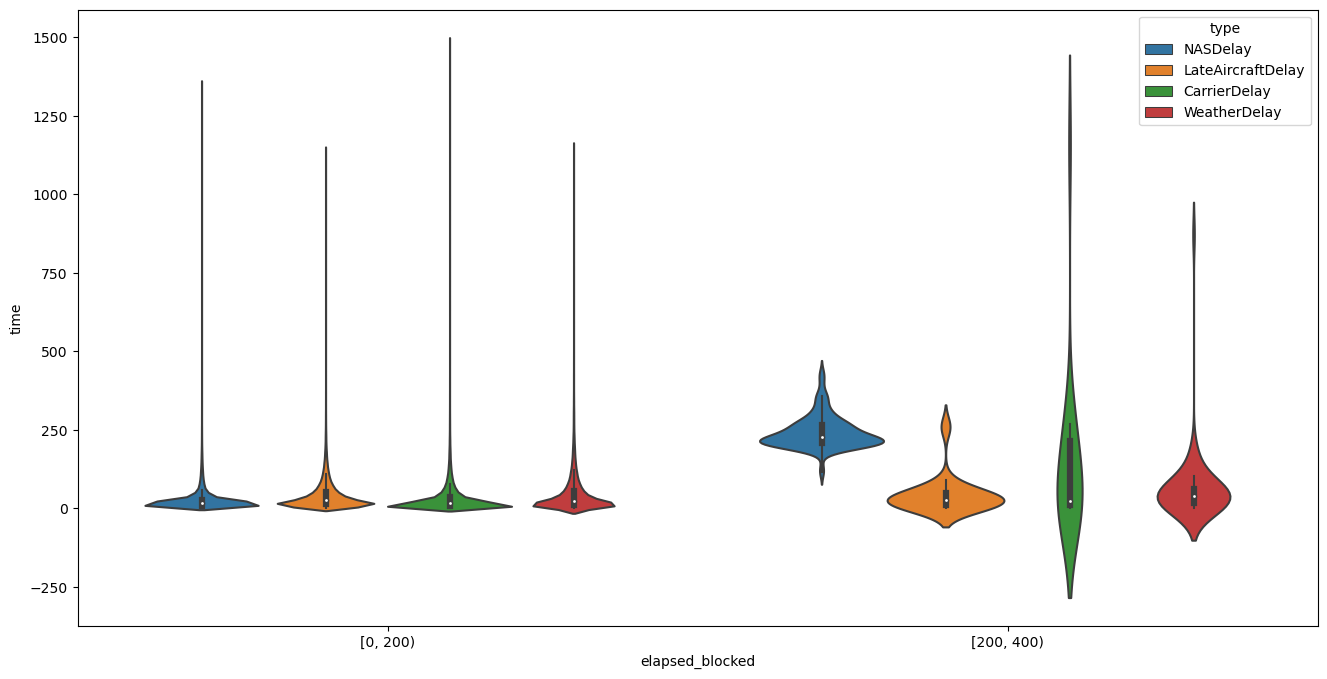

In [55]:
plt.figure(figsize=[16,8])
sb.violinplot(data=dummy3, hue="type", y="time", x="elapsed_blocked");

#### The longer DepDelay is, the longer CarrierDelay is

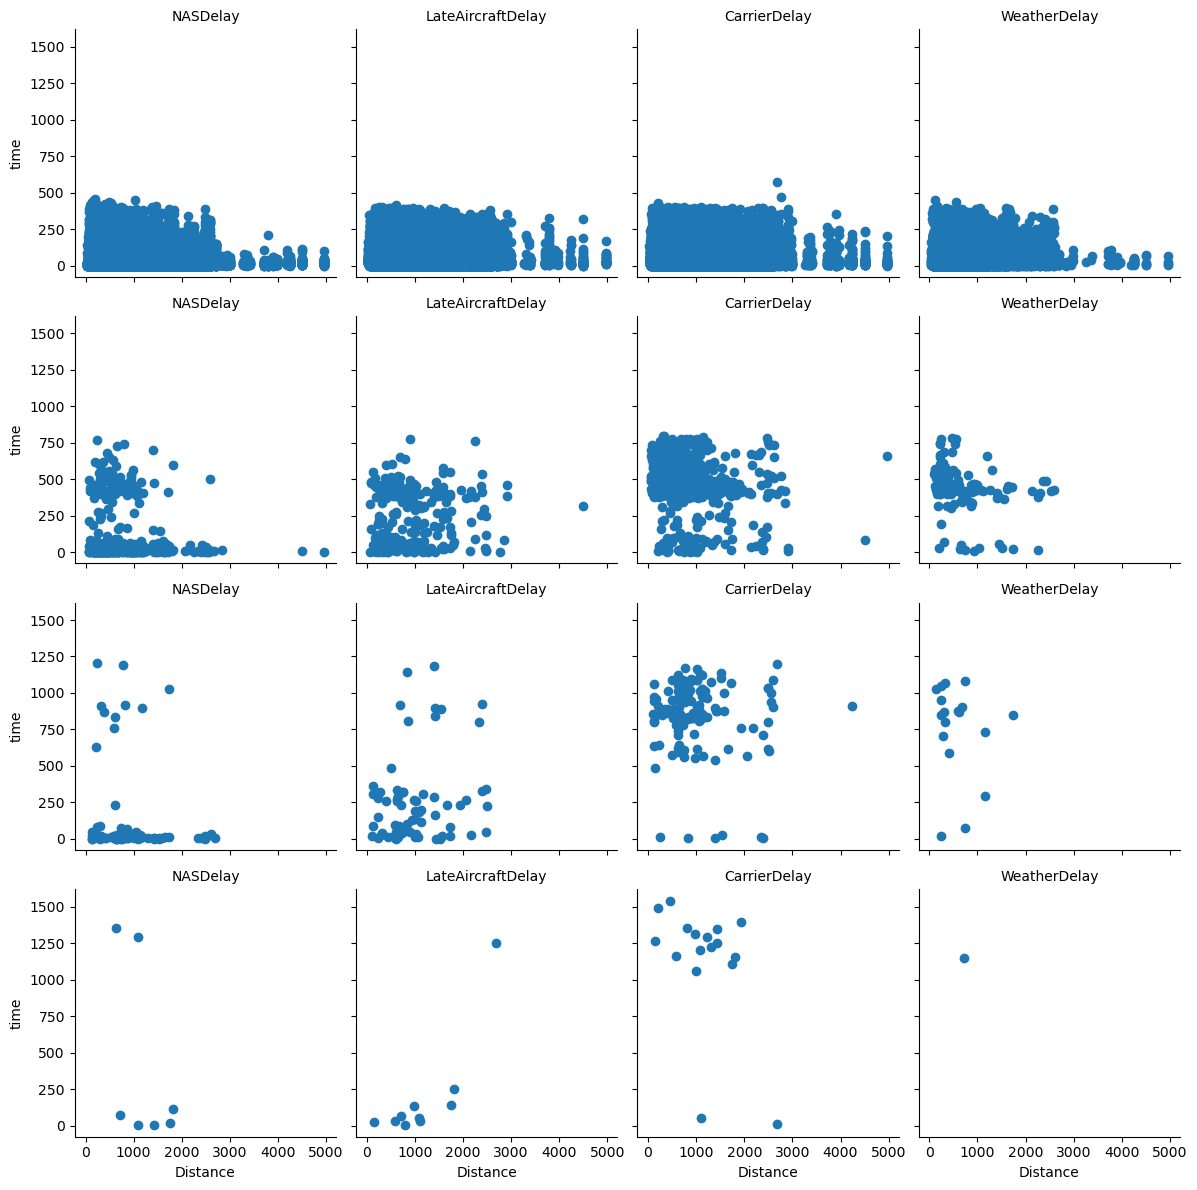

In [56]:
bin_edges = np.arange(0,2000,400)
dummy3["depdelay_blocked"] = pd.cut(dummy3.DepDelay, bin_edges, right=False, include_lowest=True)
g = sb.FacetGrid(data=dummy3, row="depdelay_blocked", col="type" )
g.map(plt.scatter, "Distance", "time")
g.set_titles('{col_name}');

In [57]:
dummy3["distance_block"] = pd.cut(dummy3.Distance, bin_edges, right=False, include_lowest=True)

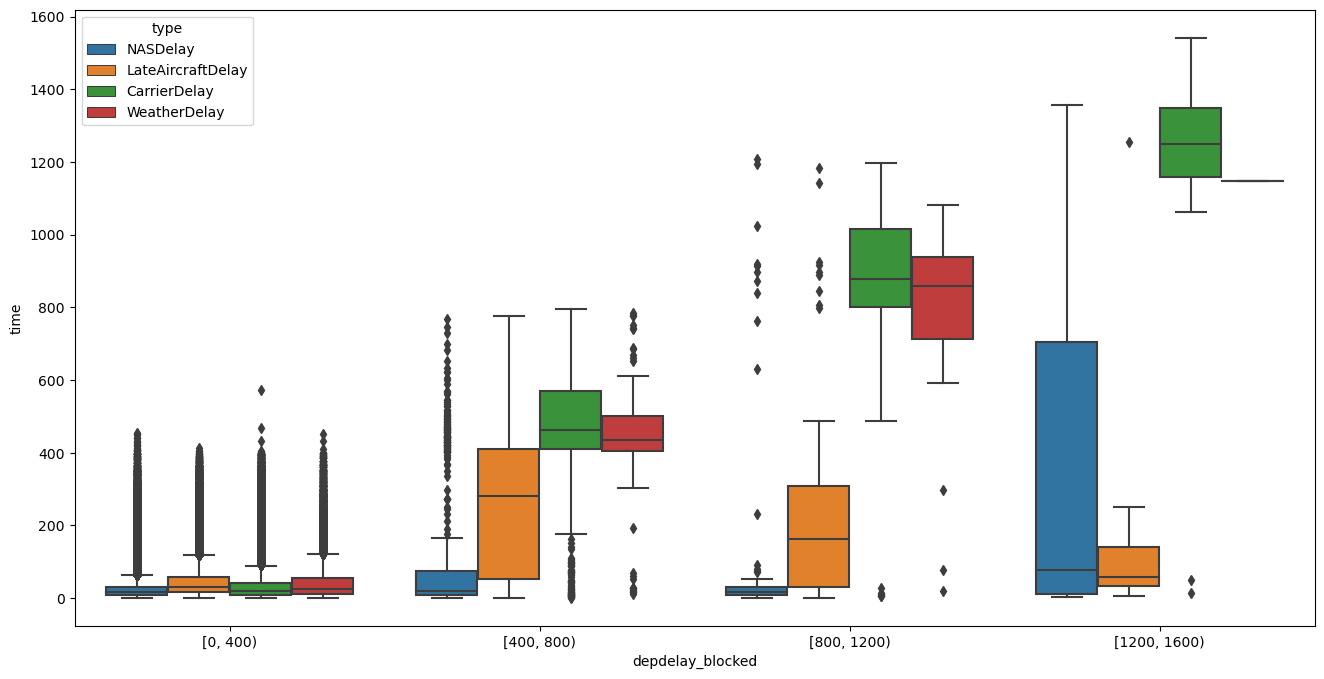

In [58]:
plt.figure(figsize=[16,8])
sb.boxplot(data=dummy3, hue="type", y="time", x="depdelay_blocked");

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The analysis conducted here using multiple variables revealed that flights with an elapsed time between 200 and 400 minutes are more likely to experience longer NAS delays. Additionally, when examining the ElapsedTimeDelay, it was found that flights with longer Departure delay times are more likely to have longer CarrierDelays and WeatherDelays.

### Were there any interesting or surprising interactions between features?

> In the previous section, I observed that there is a correlation between long ElapsedTimeDelay and long NASdelay, which is consistent with the definition of NASdelay. However, I found it intriguing that even though CarrierDelay and WeatherDelay were less common than the other two factors, they had a stronger association with long DepartureDelay when I examined them more closely.